#Epidemic Modeling

In [ ]:
pip install EoN

     |████████████████████████████████| 113 kB 8.1 MB/s 
  Created wheel for EoN: filename=EoN-1.1-py3-none-any.whl size=120819 sha256=67a88077a9b1eb3fea86cf8c1bc1ca41d41ecd08fb5b300b42ad638f42a56e13
  Stored in directory: /root/.cache/pip/wheels/0b/c0/a4/d6001fd809cb84c027ada5c2ab3b6d1cb2e97fec3f9978eae7
Successfully built EoN


In [ ]:
from networkx.algorithms import community

3.375683173091457


/usr/local/lib/python3.7/dist-packages/EoN/simulation_investigation.py:861: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,4))
/usr/local/lib/python3.7/dist-packages/EoN/simulation_investigation.py:861: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,4))
/usr/local/lib/python3.7/dist-packages/EoN/simulation_investigation.py:861: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly close

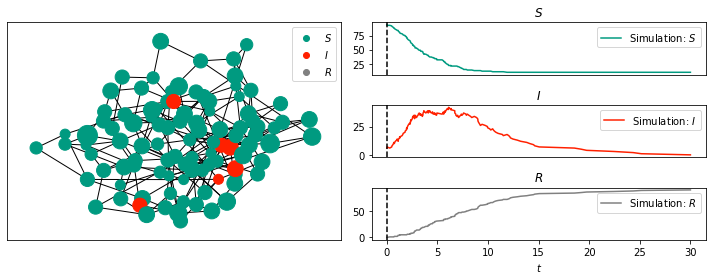

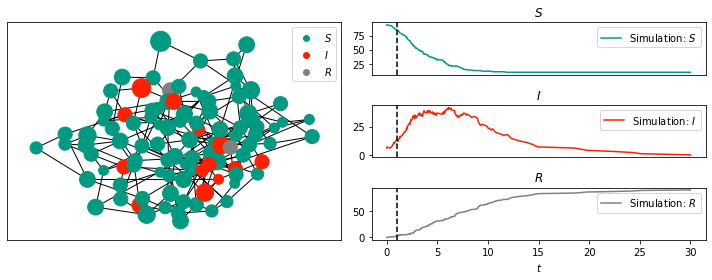

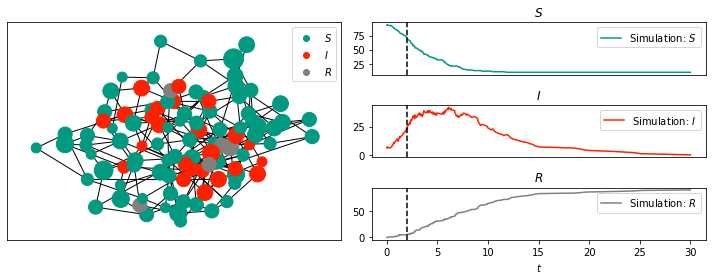

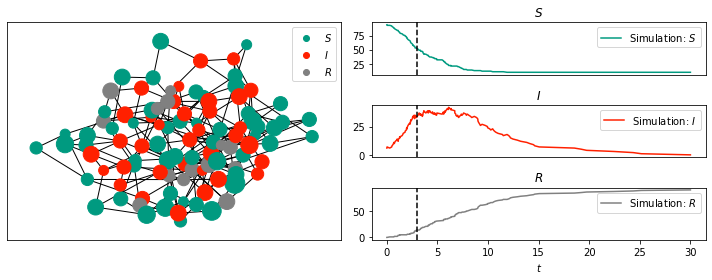

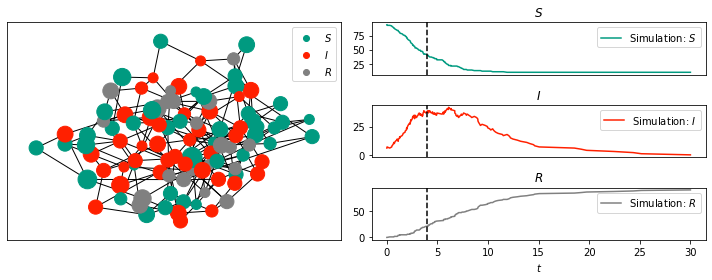

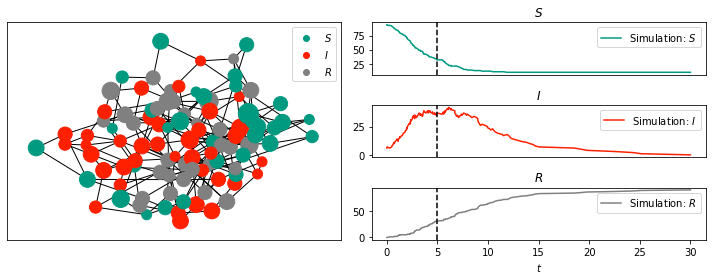

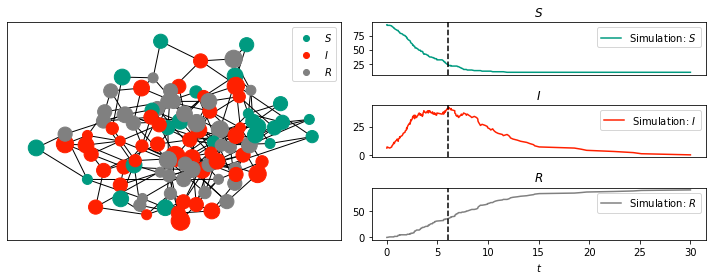

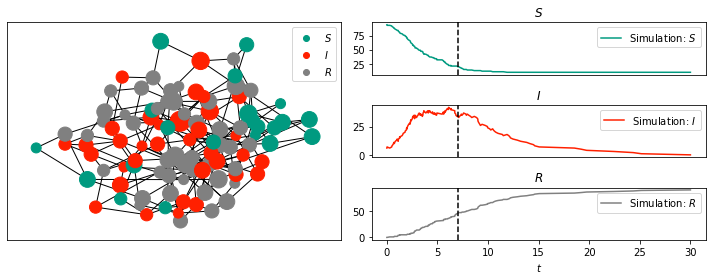

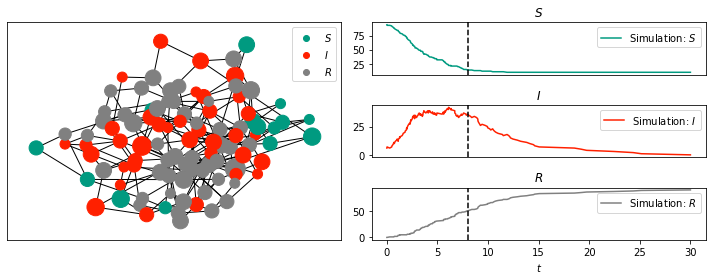

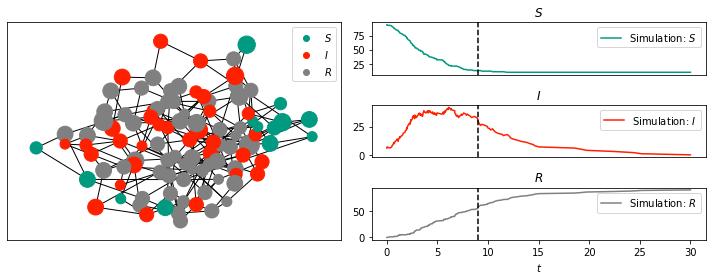

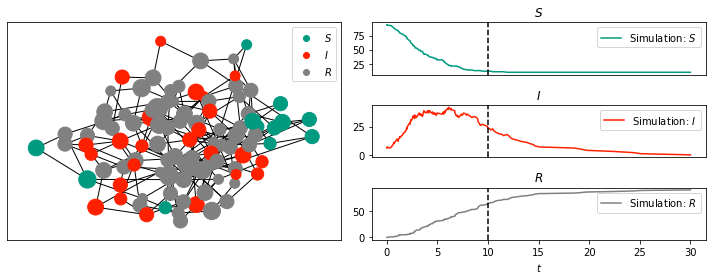

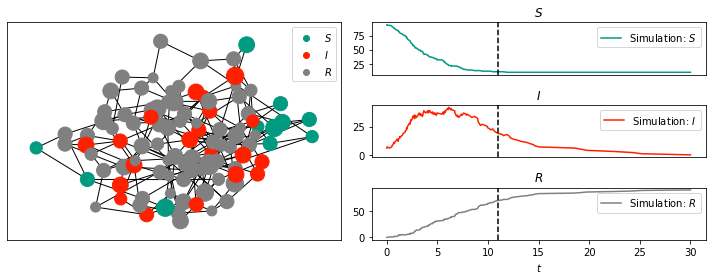

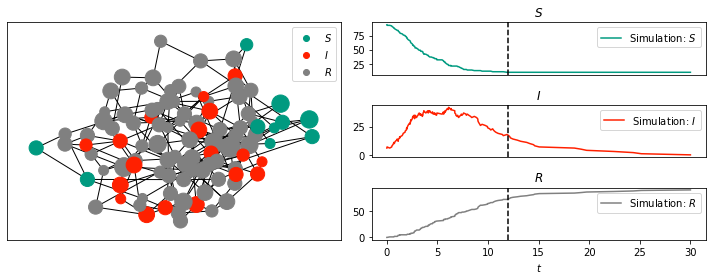

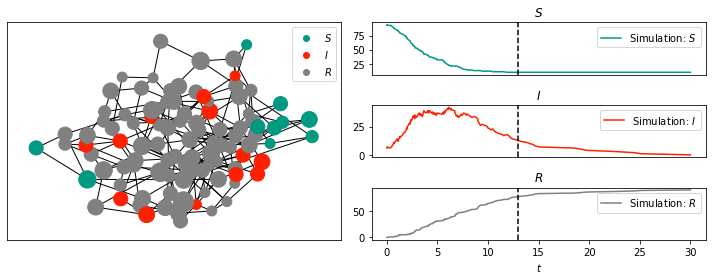

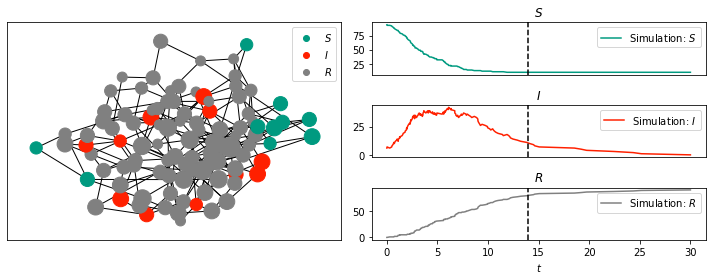

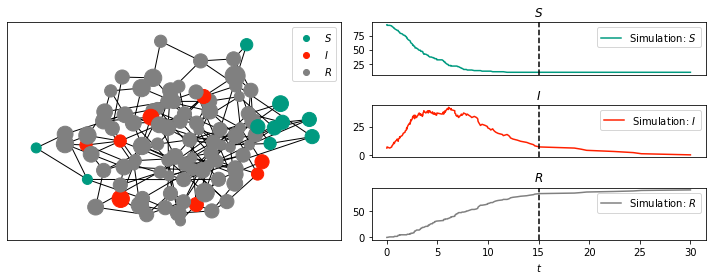

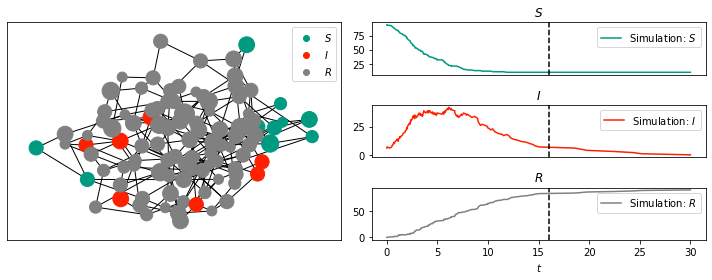

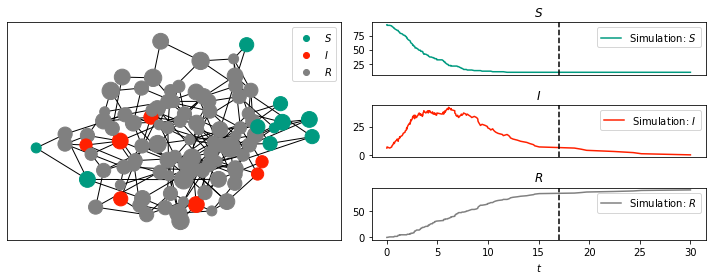

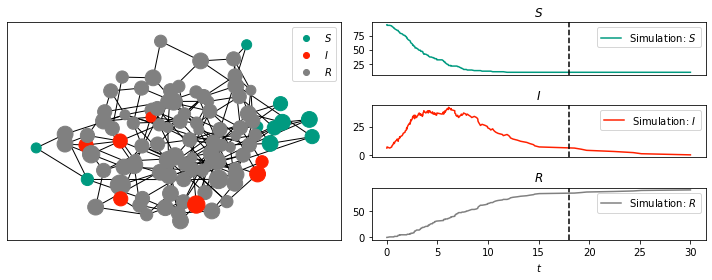

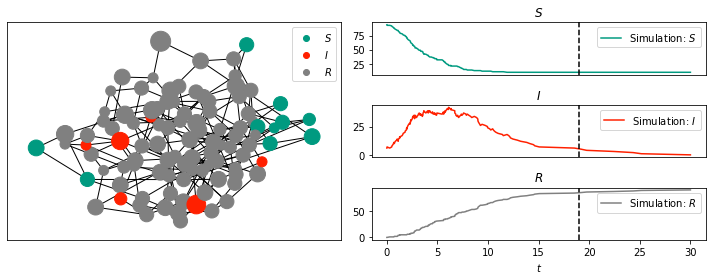

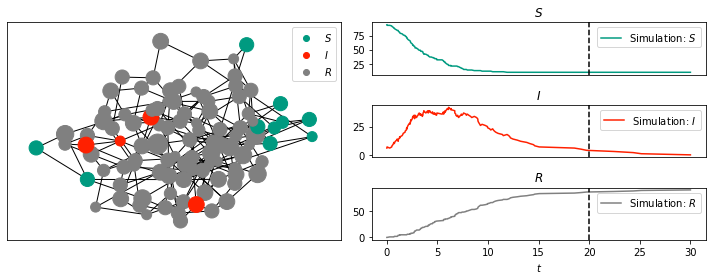

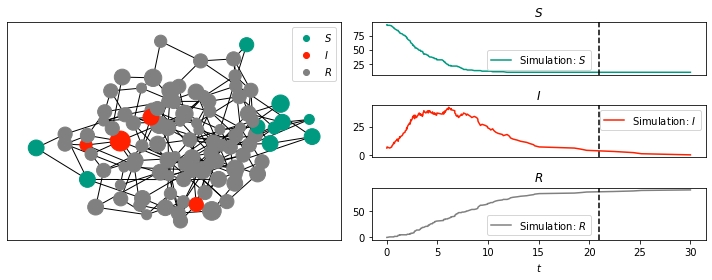

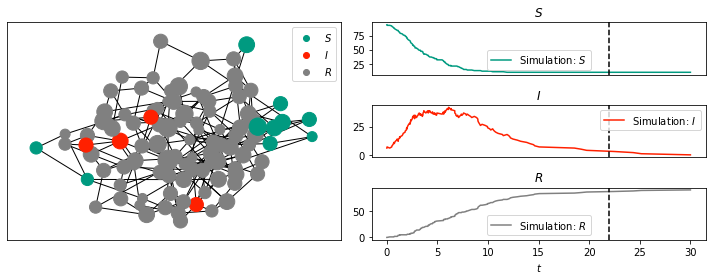

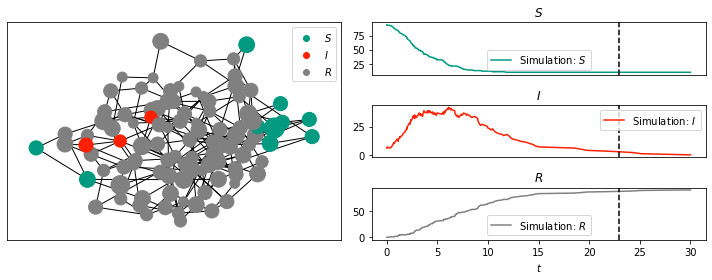

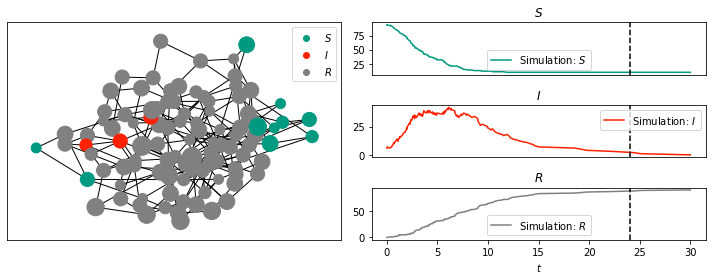

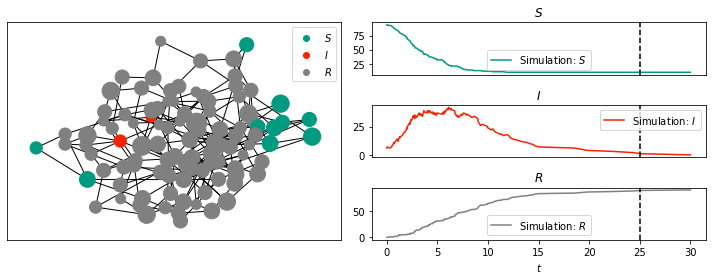

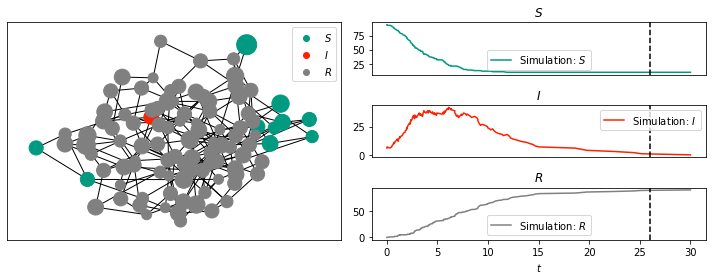

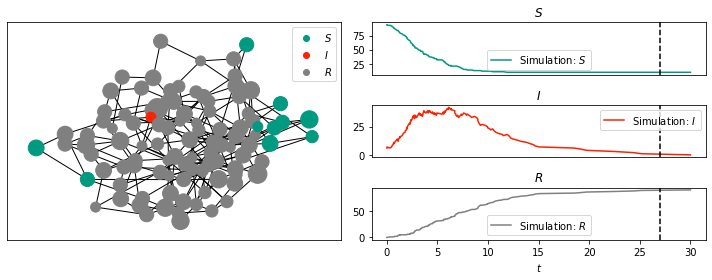

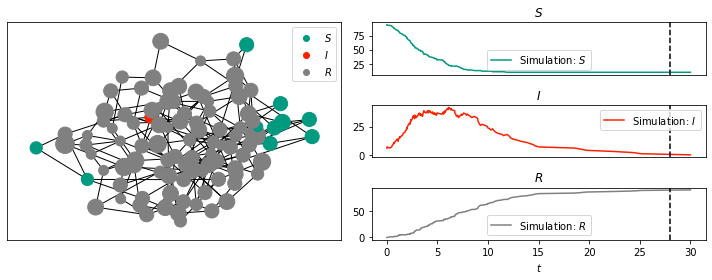

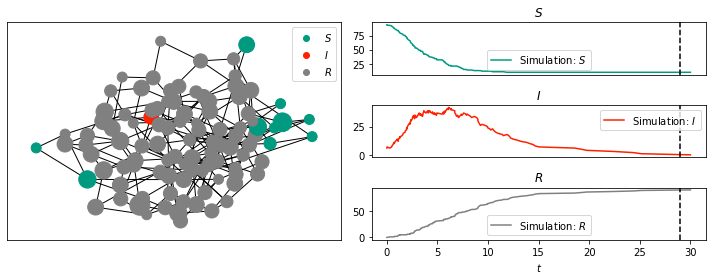

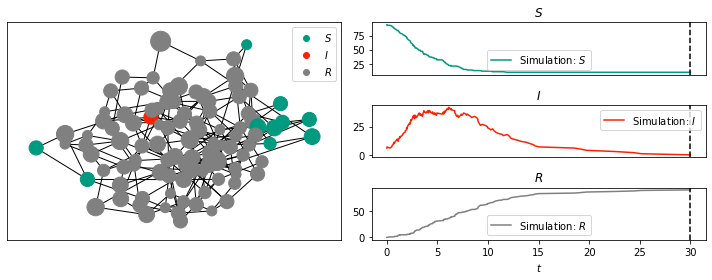

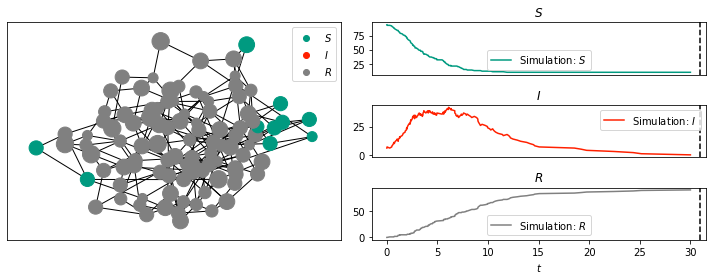

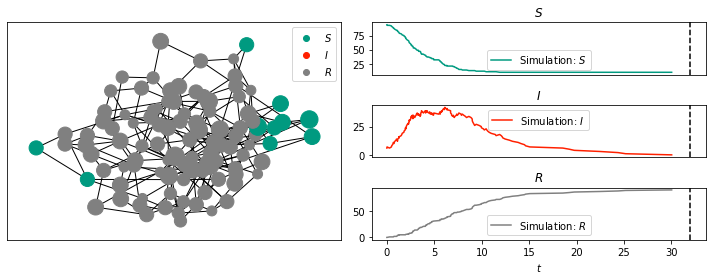

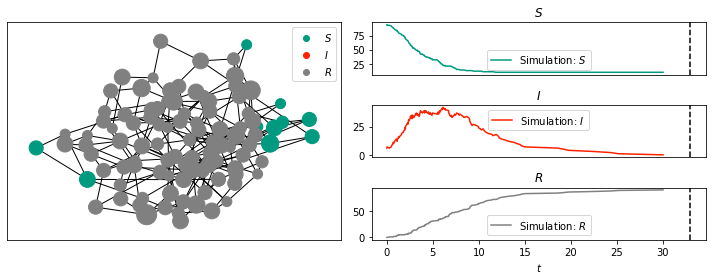

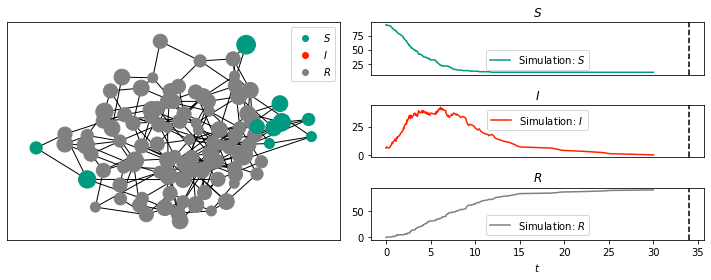

In [ ]:
import networkx as nx
import random
import numpy as np
import EoN
import matplotlib.pyplot as plt
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

g=nx.watts_strogatz_graph(n=100, k=4, p=0.6)
#g = nx.barabasi_albert_graph(1000, 5)
#plt.figure(figsize=(40,40))
#nx.draw_circular(g, with_labels = True)

E = g.number_of_edges()
w = [random.random() for i in range(E)]
s = max(w)
w = [ i/s for i in w ] #normalizing
len(w)
k = 0
for i, j in g.edges():
    g[i][j]['weight'] = w[k]
    k+=1


edgewidth = [d['weight'] for (u,v,d) in g.edges(data=True)]
pos = nx.spring_layout(g)
my_degrees = dict(g.degree())
 

labels = {}
for i in range(100):
    labels[i] = i


#preform the community detection
c = list(greedy_modularity_communities(g))

#Let's find out how many communities we detected
print(len(c))


community_0 = sorted(c[0])
community_1 = sorted(c[1])
community_2 = sorted(c[2])
community_3 = sorted(c[3])
community_4 = sorted(c[4])
community_5 = sorted(c[5])
community_6 = sorted(c[6])
community_7 = sorted(c[7])

nx.draw_networkx_nodes(g, pos, nodelist=community_0, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(g, pos,nodelist=community_1, node_color='r', alpha=0.5)
nx.draw_networkx_nodes(g, pos,nodelist=community_2, node_color='b', alpha=0.5)
nx.draw_networkx_nodes(g, pos,nodelist=community_3, node_color='k', alpha=0.5)
nx.draw_networkx_nodes(g, pos,nodelist=community_4, node_color='m', alpha=0.5)
nx.draw_networkx_nodes(g, pos,nodelist=community_5, node_color='w', alpha=0.5)
nx.draw_networkx_nodes(g, pos,nodelist=community_6, node_color='c', alpha=0.5)
nx.draw_networkx_nodes(g, pos,nodelist=community_7, node_color='y', alpha=0.5)
nx.draw_networkx_edges(g,pos,width = 0.2)
nx.draw_networkx_labels(g,pos,font_size=9)
plt.title ('Community structure in Cow Herd')
plt.show()


gamma1 = random.uniform(0.14,0.2)
gamma2 = random.uniform(0.2, 0.33)  
beta = random.uniform(0.64,0.72) 
r_0 = beta/gamma2
print(r_0)
N = 100 # population size
I0 = 6   # intial n° of infected individuals 
R0 = 0
S0 = N - I0 -R0
pos = nx.spring_layout(g)
nx_kwargs = { "pos": pos, "node_size":[v * 50 for v in my_degrees.values()]}

sim = EoN.Gillespie_SIR(g, tau = beta, gamma=gamma1, rho = I0/N, transmission_weight="weight", return_full_data=True)

for i in range(0,35,1):
    sim.display(time = i,  **nx_kwargs)
    plt.axis() 
    plt.draw()




# Testing Optimization

Different p values

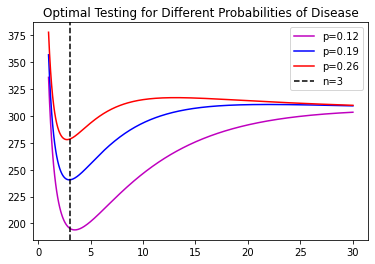

195.5584 240.56769999999997 278.4328


In [ ]:
import numpy as np
from scipy.optimize import fmin
import math
import matplotlib.pyplot as plt

S = 300        #total number of samples/cows
p1 = 0.12      #probability of the disease
p2 = 0.19
p3 = 0.26
#x = group size to be divided

def f1(x):
    return S/x + S*(1-(1-p1)**x)

def f2(x):
    return S/x + S*(1-(1-p2)**x)

def f3(x):
    return S/x + S*(1-(1-p3)**x)


x = np.linspace(1,30, 300)
plt.plot(x, f1(x),'m', label = 'p=0.12')
plt.plot(x, f2(x),'b', label = 'p=0.19')
plt.plot(x, f3(x),'r', label = 'p=0.26')
plt.axvline(x=3, color ='k', ls='--', label='n=3')
plt.legend()
plt.title('Optimal Testing for Different Probabilities of Disease')
plt.show()
print (f1(3),f2(3),f3(3))

Different S values

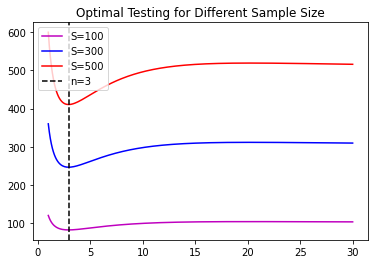

82.13333333333333 246.39999999999998 410.66666666666663


In [ ]:
import numpy as np
from scipy.optimize import fmin
import math
import matplotlib.pyplot as plt

S1 = 100        #total number of samples/cows
S2 = 300
S3 = 500
p = 0.2      #probability of the disease
#x = group size to be divided

def f1(x):
    return S1/x + S1*(1-(1-p)**x)

def f2(x):
    return S2/x + S2*(1-(1-p)**x)

def f3(x):
    return S3/x + S3*(1-(1-p)**x)


x = np.linspace(1,30, 300)
plt.plot(x, f1(x),'m', label = 'S=100')
plt.plot(x, f2(x),'b', label = 'S=300')
plt.plot(x, f3(x),'r', label = 'S=500')
plt.axvline(x=3, color ='k', ls='--', label='n=3')
plt.legend()
plt.title('Optimal Testing for Different Sample Size')
plt.show()
print (f1(3),f2(3),f3(3))